In [1]:
from skimage.io import imread as skimread
from pathlib import Path
import torch
import numpy as np
from tnia.deeplearning.dl_helper import quantile_normalization
from torchvision import transforms
from torchvision.transforms import v2

c:\Users\bnort\miniconda3\envs\pytorch_and_SAM3\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
from pathlib import Path
import os

tnia_images_path = Path(r"D:\images")
parent_path = r'C:\Users\bnort\Documents\bcs-stardist\images\Columbia_Semantic_Sparse'
model_path = os.path.join(parent_path,'models')

In [3]:
net = torch.load( Path(model_path) / 'model1')
device = torch.device("cuda")
net.to(device)

Sequential(
  (0): UNet(
    (l_conv): ModuleList(
      (0): ConvPass(
        (conv_pass): Sequential(
          (0): Conv2d(3, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
          (1): ReLU()
          (2): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
          (3): Conv2d(32, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
          (4): ReLU()
          (5): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        )
      )
      (1): ConvPass(
        (conv_pass): Sequential(
          (0): Conv2d(32, 96, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
          (1): ReLU()
          (2): BatchNorm2d(96, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
          (3): Conv2d(96, 96, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
          (4): ReLU()
          (5): BatchNorm2d(96, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        )
      )
      (2): Con

In [4]:
from skimage.io import imread
im = imread(r'C:\Users\bnort\Documents\bcs-stardist\images\Columbia_Semantic_Sparse\20240910205928_SEP10ERSP2424346.jpg')
im = np.transpose(im, (2,0,1))  
im.shape
im = im[:,:2048,:2048]

In [5]:
# Visualize predictions
from tnia.deeplearning.dl_helper import quantile_normalization

#im, raw = train_dataset[10]

net.eval()

print(im.shape, im.min(), im.max())
im = quantile_normalization(im)
im = im.astype(np.float32)
print(im.shape, im.min(), im.max())
im_tensor = torch.from_numpy(im).unsqueeze(0).to(device)       
print(im_tensor.shape)

logits=net(im_tensor)


(3, 2048, 2048) 52 255
(3, 2048, 2048) 0.0 1.0
torch.Size([1, 3, 2048, 2048])


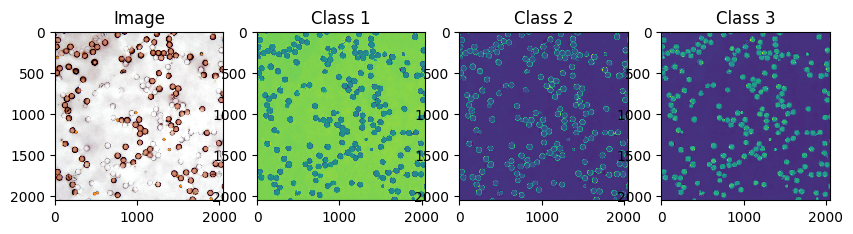

In [6]:
from tnia.plotting.plt_helper import imshow_multi2d

im = np.transpose(im, (1,2,0))

logits.shape
c1 = logits[0,0,:,:].cpu().detach().numpy()
c2 = logits[0,1,:,:].cpu().detach().numpy()
c3 = logits[0,2,:,:].cpu().detach().numpy()

fig = imshow_multi2d([im, c1, c2, c3], ['Image', 'Class 1', 'Class 2', 'Class 3'], 1, 4, 10, 10,colormaps=['gray', 'viridis', 'viridis', 'viridis'])

In [22]:
# go through 3 classes and take highest

class1 = (c1>c2)&(c1>c3)
class2 = (c2>c1)&(c2>c3)
class3 = (c3>c1)&(c3>c2)

labels = class1+2*class2+3*class3

In [23]:
import napari
viewer = napari.Viewer()
viewer.add_image(im)
viewer.add_labels(labels)
#viewer.add_image(c1)
#viewer.add_image(c2)
#viewer.add_image(c3)

<Labels layer 'labels' at 0x28b9361d9c0>

In [18]:
thresholded = c2 > 3.0
viewer.add_labels(thresholded*2)

<Labels layer 'Labels' at 0x28ba1e78ca0>

In [17]:
thresholded3 = c3 > 10.0
viewer.add_labels(thresholded3*3)

<Labels layer 'Labels [2]' at 0x28ba14c1330>